# Investigating Fandango movie ratings using pandas and statistics
This project aims to figure out if the website Fandango still inflates its displayed ratings (see this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/)). We'll use old and current data and compare the two. The old data can be found [here](https://github.com/fivethirtyeight/data/tree/master/fandango), the new data [here](https://github.com/mircealex/Movie_ratings_2016_17). Did Fandago fix the so-called "bug" that made its displayed ratings round up, increasing the likelihood of movie goers purchasing tickets?
## Reading and exploring the data

In [1]:
import pandas as pd
old_data = pd.read_csv('fandango_score_comparison.csv')
new_data = pd.read_csv('movie_ratings_16_17.csv')
old_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
new_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


## Cleaning the data
Let's trim the data down to the essential.

In [19]:
old_data = old_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
new_data = new_data[['movie', 'year', 'fandango']]

The first data set is restricted to movies that had tickets on sale in 2015, while the newer data set is restricted to movies released after 2016. The ratings inflation in both may be due to other factors since these samples do not represent the whole population of movies.

Let's determine instead if popular movie ratings are still inflated on the website. The threshold for popularity used in the first sample is 30 ratings. Unfortunately, Fandango does not provide the data about the number of votes anymore (2019), having switched to an external rating system. We will have to assume the majority of the movies in the new data set are popular as well.

Next step is to remove any movie that might not be from 2015 in the old data and 2016 in the new data.

In [3]:
old_data['Year'] = old_data['FILM'].str[-5:-1]
print(old_data['Year'].value_counts())

2015    129
2014     17
Name: Year, dtype: int64


In [4]:
print(new_data['year'].value_counts())

2016    191
2017     23
Name: year, dtype: int64


In [5]:
old_data_fixed = old_data[old_data['Year'] == '2015'].copy()
new_data_fixed = new_data[new_data['year'] == 2016].copy()

In [6]:
print(old_data_fixed['Year'].value_counts())
print(new_data_fixed['year'].value_counts())

2015    129
Name: Year, dtype: int64
2016    191
Name: year, dtype: int64


## Analyzing the data
Now that the data is prepped, let's see how the rating distributions compare

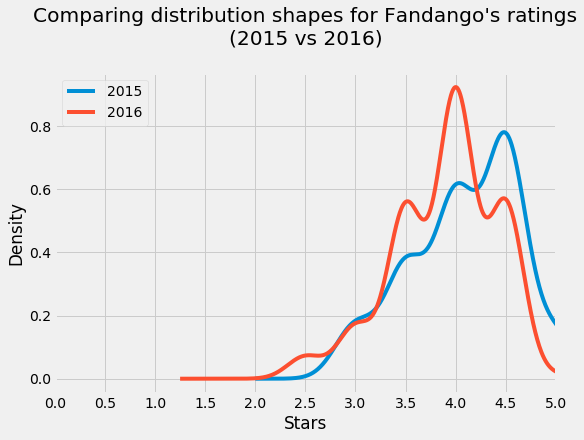

In [7]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

old_data_fixed['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
new_data_fixed['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

Although both distributions are left skewed, the older data is shifted to the right by about half a star. On average, movies in 2016 were rated 4 stars, slightly lower than in 2015.

Let's see if tables provide the same insight:

In [8]:
print(old_data_fixed['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=False)*100)
print(new_data_fixed['fandango'].value_counts(normalize=True).sort_index(ascending=False)*100)

5.0     6.976744
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
Name: Fandango_Stars, dtype: float64
5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64


There is a clear shift downard in the ratings between the old and new data.

To make sure this is true, let's compare summary statistics.

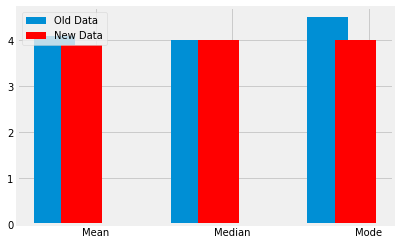

In [9]:
old_mean = old_data_fixed['Fandango_Stars'].mean()
old_median = old_data_fixed['Fandango_Stars'].median()
old_mode = old_data_fixed['Fandango_Stars'].mode()[0]

new_mean = new_data_fixed['fandango'].mean()
new_median = new_data_fixed['fandango'].median()
new_mode = new_data_fixed['fandango'].mode()[0]

plt.bar([0,1,2], [old_mean, old_median, old_mode], width=0.3, label='Old Data')
plt.bar([0.2,1.2,2.2], [new_mean, new_median, new_mode], width=0.3, color='red', label='New Data')
plt.xticks([0.3,1.3,2.3],['Mean', 'Median', 'Mode'])
plt.legend()

## Conclusion
The fandango ratings were slightly lower in 2016 compared to 2015. The change is small, but exists. Fandango did do something in response to the article!